# Plotting Scatterplot

In [10]:
import sys
sys.path.insert(0, '../../../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle as pkl
import tensorflow as tf

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from kraus_channels import KrausMap
from loss_functions import ProbabilityMSE, ProbabilityRValue, channel_fidelity_loss
from optimization import ModelSPAM, ModelQuantumMap, Logger, model_saver
from quantum_channel import DilutedChannel, ChoiMapStatic
from quantum_tools import apply_unitary, measurement, resample, state_fidelity
from experimental import counts_to_probs, generate_pauliInput_circuits, generate_pauli_circuits, marginalize_counts
from spam import SPAM, InitialState, POVMwQR as POVM, IdealPOVM, IdealInit, povm_fidelity, CorruptionMatrix, IdealSPAM
from synthetic_data import generate_spam_data, generate_map_data
from utils import saver, loader, train_val_split
from quantum_circuits import pqc_basic
from spectrum import channel_spectrum, complex_spacing_ratio, Spectrum, coat_spectrum, spectrum_to_angular, spectrum_to_radial
from qiskit.circuit.library import iSwapGate


#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Load Data

In [11]:
data = np.loadtxt("bookkeeping/figure3/scatterplot_mean.txt")
r_mean, a_mean = data[:,0], data[:,1]

data = np.loadtxt("bookkeeping/figure3/scatterplot_std.txt")
r_std, a_std = data[:,0], data[:,1]


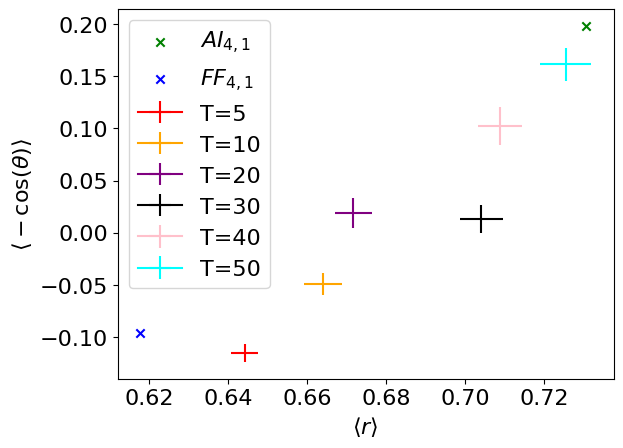

In [ ]:
L_list = [5, 10, 20, 30, 40, 50]
color_list = ['red', 'orange', 'purple', 'black', 'pink', 'cyan']

AI_theory, FF_theory = np.loadtxt("bookkeeping/figure3/scatterplot_theory.txt")

plt.errorbar(r_mean[0], a_mean[0], xerr=r_std[0], yerr=a_std[0], fmt='-', label='T=5', color=color_list[0])
plt.errorbar(r_mean[1], a_mean[1], xerr=r_std[1], yerr=a_std[1], fmt='-', label='T=10', color=color_list[1])
plt.errorbar(r_mean[2], a_mean[2], xerr=r_std[2], yerr=a_std[2], fmt='-', label='T=20', color=color_list[2])
plt.errorbar(r_mean[3], a_mean[3], xerr=r_std[3], yerr=a_std[3], fmt='-', label='T=30', color=color_list[3])
plt.errorbar(r_mean[4], a_mean[4], xerr=r_std[4], yerr=a_std[4], fmt='-', label='T=40', color=color_list[4])
plt.errorbar(r_mean[5], a_mean[5], xerr=r_std[5], yerr=a_std[5], fmt='-', label='T=50', color=color_list[5])

#font size
plt.rc('font', size=16)          # controls default text sizes
#plt.plot(r_poisson, a_poisson, 'x', color='black', label='Poisson')
plt.scatter(AI_theory[0], AI_theory[1], marker='x', label='$AI_{4,1}$', color='green')
plt.scatter(FF_theory[0], FF_theory[1], marker='x', label='$FF_{4,1}$', color='blue')

plt.xlabel(r'$\langle r \rangle$')
plt.ylabel(r'$\langle -\cos(\theta) \rangle$')
plt.legend()
#plt.grid()
plt.savefig('figures/integrable_scatter.svg', bbox_inches='tight')
plt.show()
